In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

%matplotlib inline

In [7]:
# menyembunyukan future warning dan convergence warning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [8]:
# memuat data dan encoding
data = pd.read_csv("Global_Superstore2.csv", encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [9]:
# menampilkan informasi tentang dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [10]:
# menampilkan jumlah miss value
print(data.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [13]:
# menghapus baris yang memiliki nilai null
data_cleaned = data.dropna()

In [14]:
# menghapus kolom yang tidak digunakan
columns_to_drop = ['Order ID', 'Ship Date', 'Postal Code', 'Region']
data.drop(columns=columns_to_drop, inplace=True)

In [15]:
# memilih fitur untuk normalisasi
features_to_normalize = ['Profit', 'Sales']
X = data[features_to_normalize]

In [17]:
# menerapkan standard scaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [19]:
X = data.drop(['Row ID'], axis=1)

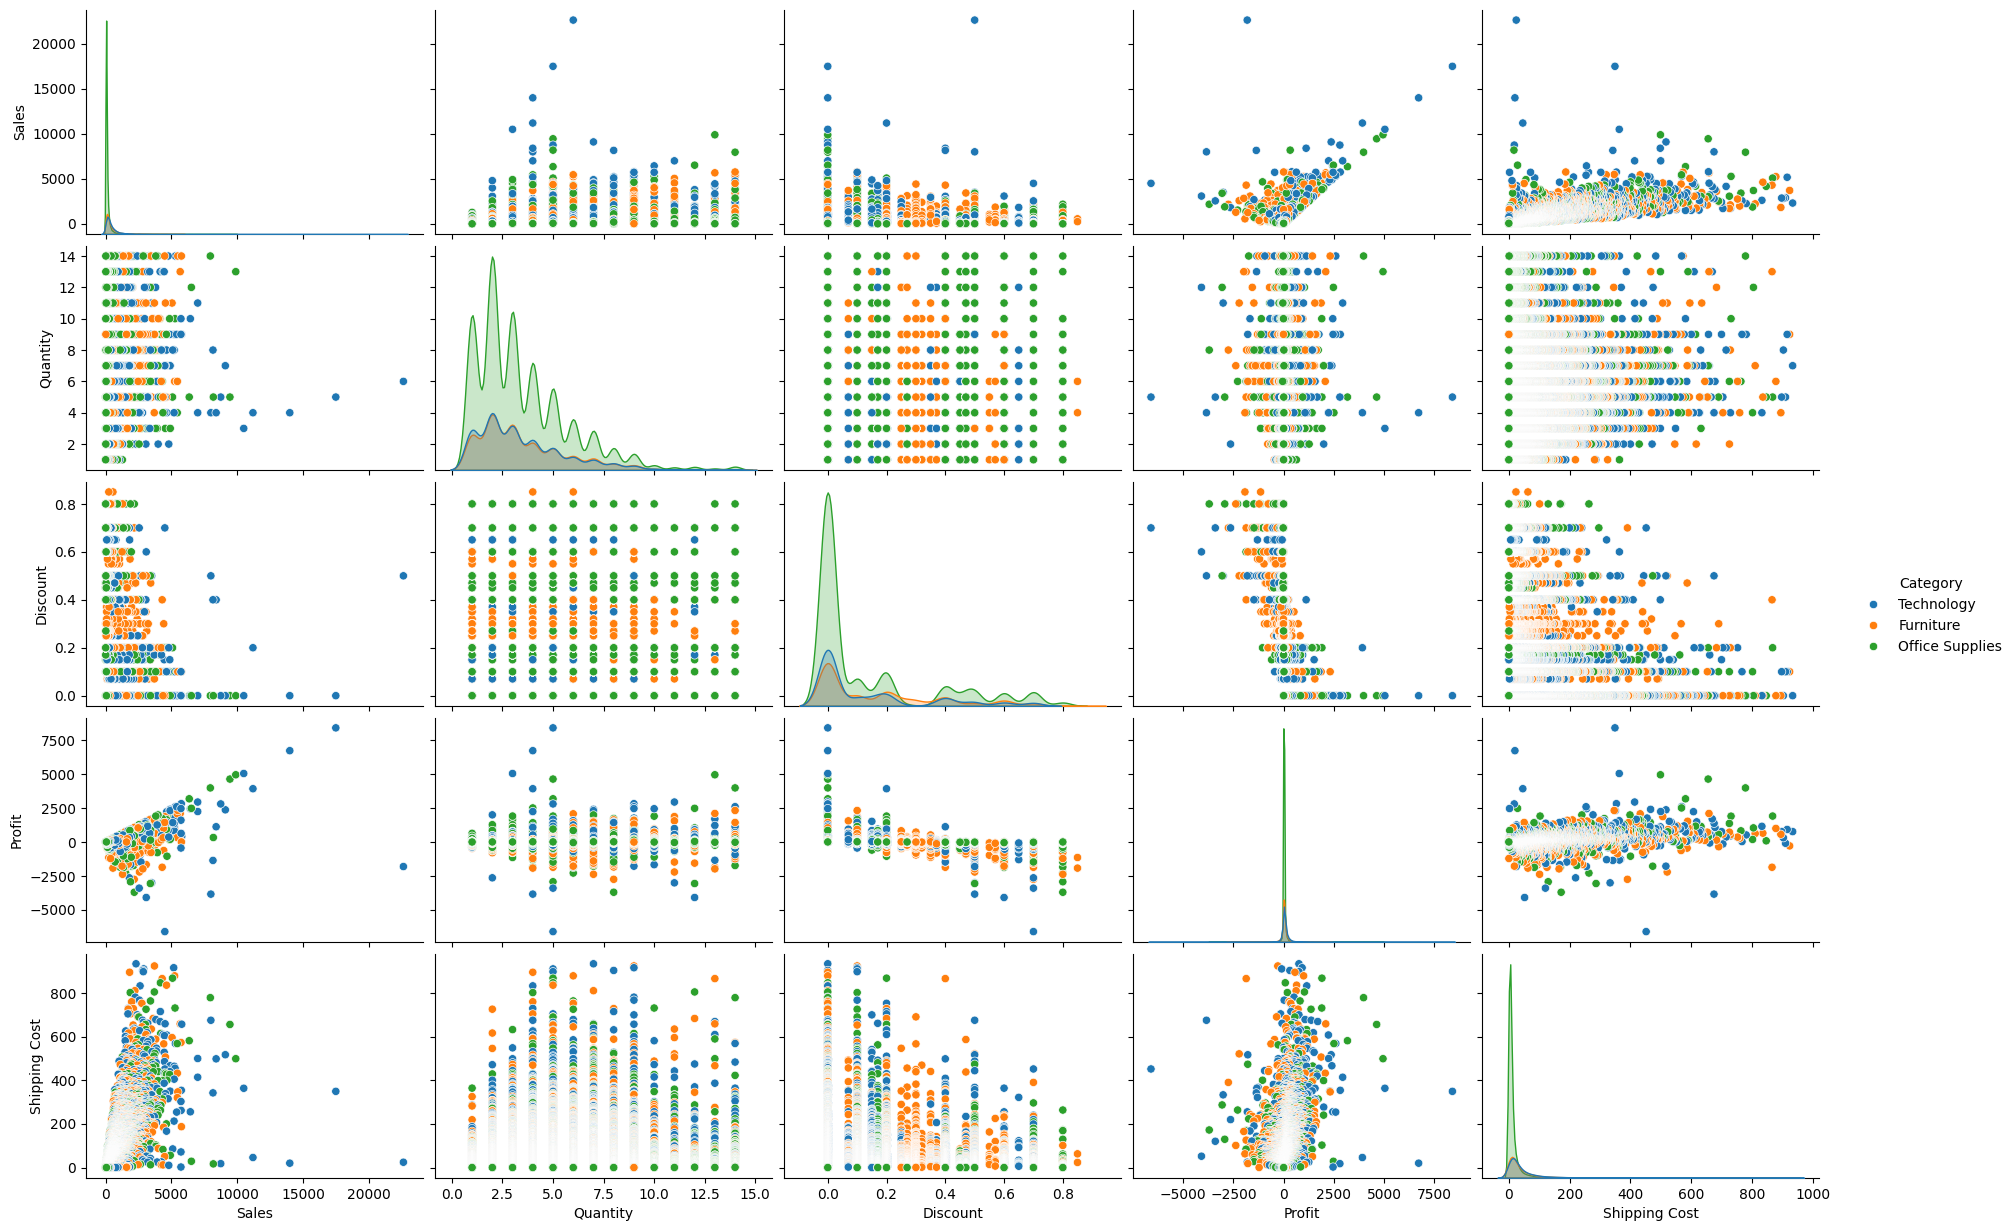

In [20]:
# melihat dengan pairplot
sns.pairplot(data.drop('Row ID', axis=1), hue='Category', aspect=1.5)
plt.show()

K-Means Clustering

In [23]:
# mencari jumlah cluster
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_normalized)
    clusters.append(km.inertia_)

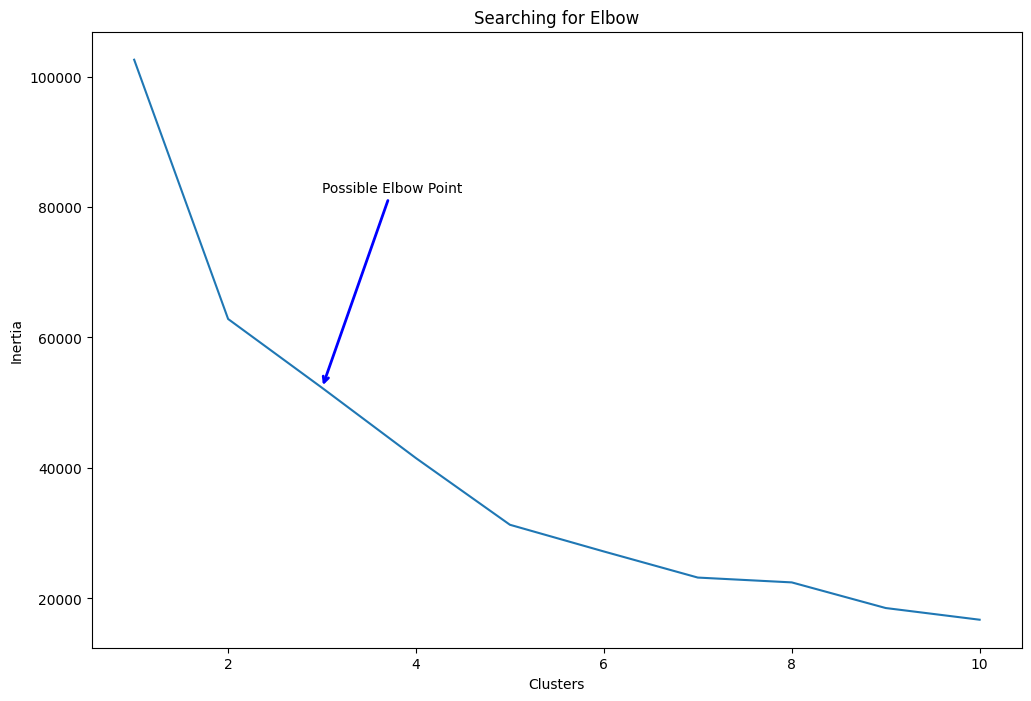

In [36]:
# visualisasi
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(3, clusters[2]), xytext=(3, clusters[2] + 30000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

In [27]:
# model K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_normalized)
kmeans.labels_

array([2, 1, 2, ..., 0, 0, 0])

In [29]:
# menambahkan kolom cluster_labels ke dalam dataframe
data['Cluster'] = kmeans.labels_
data.head()

,Row ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster
0,32298,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2
1,26341,05-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,1
2,25330,17-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2
3,13524,28-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,1
4,47221,05-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,1


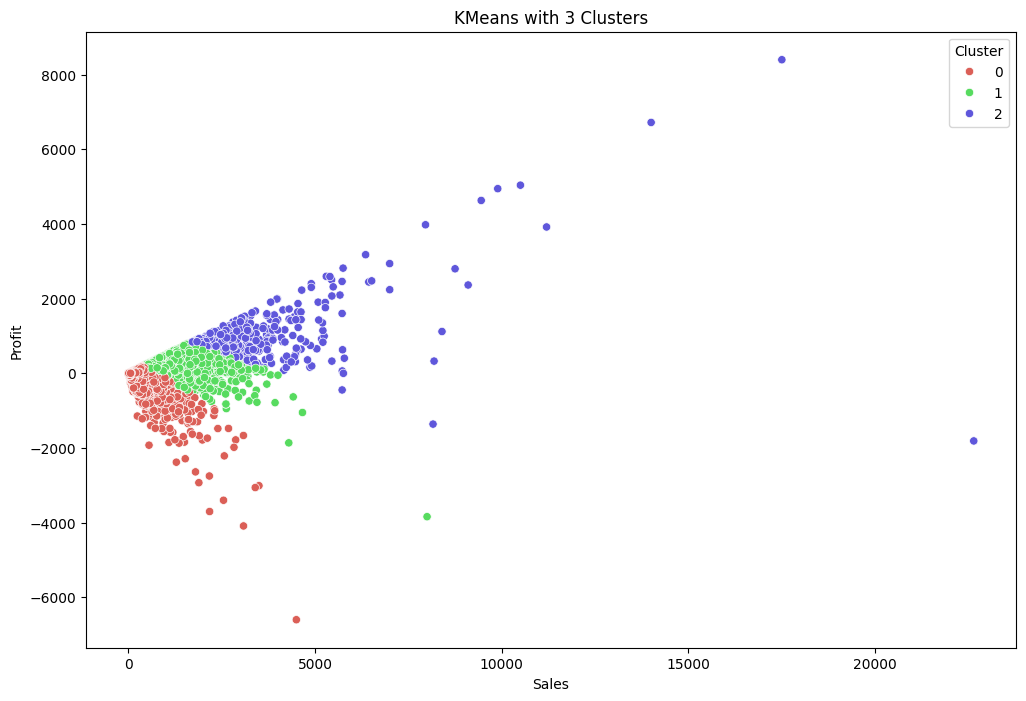

In [30]:
# visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Sales'], y=X['Profit'], hue=data['Cluster'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [33]:
def describe_by_cluster(X, column):
    stats_by_cluster = X.groupby('Cluster')[column].describe()
    return stats_by_cluster

stats_profit = describe_by_cluster(data, 'Profit')
stats_profit

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,46414.0,2.080078,106.631844,-6599.9780,-1.292750,7.2576,25.680,213.120
1,4456.0,211.087089,197.822639,-3839.9904,109.448325,206.6625,304.746,790.470
2,420.0,1024.544038,786.535953,-1811.0784,713.610000,873.7635,1136.430,8399.976


Karakteristik dari K-Means Clusterring
1. Cluster 0 merupakan pelanggan yang memiliki pengeluaran dalam belanja di bawah rata-rata
2. Cluster 1 merupakan pelanggan yang memiliki pengeluaran dalam belanja rata-rata atau tengah atau standar
3. Cluster 2 merupakan pelanggan yang memiliki pengeluaran dalam belanja di atas rata-rata

Agglomerative Hierarchical Clustering

In [ ]:
agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_normalized)

data['Cluster'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X['Sales'], y=X['Profit'], hue=data['Cluster'], palette=sns.color_palette('hls', 3))

plt.title('Agglomerative with 3 Clusters')
plt.show()

DBSCAN

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Global_Superstore2.csv", encoding='latin1')

In [4]:
data_cluster = data[['Quantity', 'Sales']]

In [5]:
model_dbscan = DBSCAN(eps=0.5, min_samples=5)
model_dbscan.fit(data_cluster)
data["Cluster"] = model_dbscan.labels_

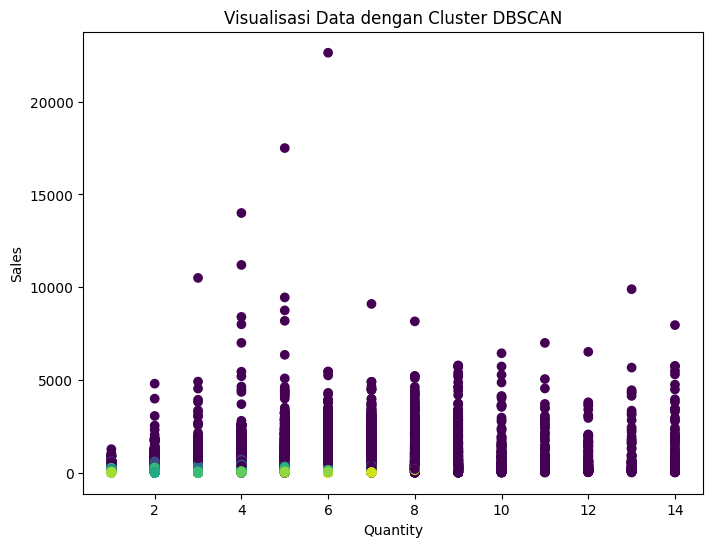

In [7]:
# Visualisasi data dengan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_cluster['Quantity'], data_cluster['Sales'], c=data['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.title('Visualisasi Data dengan Cluster DBSCAN')
plt.show()

KARAKTERISTIK DARI DBSCAN
1. Cluster 0:
   - Cluster ini mewakili pelanggan dengan kepadatan data point yang rendah, menunjukkan bahwa mereka adalah outlier atau tidak cocok dengan cluster lainnya.
   - Nilai rata-rata (mean) untuk "Order Quantity" dan "Sales" relatif rendah, menunjukkan bahwa pelanggan ini melakukan sedikit pembelian dan menghasilkan pendapatan yang rendah.
   - Cluster ini mungkin termasuk pelanggan baru, pelanggan yang jarang berbelanja, atau pelanggan yang melakukan pembelian dalam jumlah kecil.

2. Cluster 1 :
   - Cluster ini mewakili pelanggan dengan kepadatan data point yang moderat, menunjukkan bahwa mereka memiliki perilaku pembelian yang agak konsisten.
   - Nilai rata-rata (mean) untuk "Order Quantity" dan "Sales" juga moderat, menunjukkan bahwa pelanggan ini melakukan pembelian dalam jumlah sedang dan menghasilkan pendapatan moderat.
   - Cluster ini mungkin termasuk pelanggan tetap yang melakukan pembelian dalam jumlah kecil dan besar.


3. Cluster 2 :
   - Cluster ini mewakili pelanggan dengan kepadatan data point yang tinggi, menunjukkan bahwa mereka memiliki aktivitas pembelian yang konsisten dan tinggi.
   - Nilai rata-rata (mean) untuk "Order Quantity" dan "Sales" keduanya tinggi, menunjukkan bahwa pelanggan ini melakukan pembelian dalam jumlah banyak dan menghasilkan pendapatan yang tinggi.
   - Cluster ini mungkin termasuk pelanggan loyal yang sering melakukan pembelian dalam jumlah besar.

